In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from skimage.feature import hog
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from mlxtend.plotting import plot_confusion_matrix


In [4]:
# Muat dataset MNIST
data_latih = pd.read_csv('C:/Users/msofi/emnist-bymerge-train.csv', header=None)
data_uji = pd.read_csv('C:/Users/msofi/emnist-bymerge-test.csv', header=None)

In [5]:
latih_1 = data_latih.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
latih_2 = data_latih.iloc[:, 0].values.astype('int')
uji_1 = data_uji.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
uji_2 = data_uji.iloc[:, 0].values.astype('int')

In [6]:
# Bagi dataset menjadi data latih dan uji
X_train, y_train = np.array(latih_1[:1000]), np.array(latih_2[:1000])
X_test, y_test = np.array(uji_1[:10]), np.array(uji_2[:10])

In [58]:
# Ekstraksi fitur HOG untuk data latih
hog_features_train = []
hog_images_train = []
for image in X_train:
    feature, hog_img = hog(image.reshape((28, 28)), 
                           orientations = 18, 
                           pixels_per_cell = (2,2), 
                           cells_per_block = (2,2), 
                           visualize = True, 
                           block_norm = 'L1')
    hog_features_train.append(feature)
    hog_images_train.append(hog_img)

hog_features_train_np = np.array(hog_features_train)
hog_images_train_np = np.array(hog_images_train)

In [59]:
# Ekstraksi fitur HOG untuk data uji
hog_features_test = []
hog_images_test = []
for image in X_test:
    feature, hog_img = hog(image.reshape((28, 28)), 
                           orientations = 18, 
                           pixels_per_cell = (2,2), 
                           cells_per_block = (2,2), 
                           visualize = True, 
                           block_norm = 'L1')
    hog_features_test.append(feature)
    hog_images_test.append(hog_img)

hog_features_test_np = np.array(hog_features_test)
hog_images_test_np = np.array(hog_images_test)    

In [60]:
# Normalisasi fitur HOG
scaler = StandardScaler()
hog_features_train_scaled = scaler.fit_transform(hog_features_train_np)
hog_features_test_scaled = scaler.transform(hog_features_test_np)


In [61]:
# Latih model SVM
svm_model = svm.SVC(kernel='linear', C=1)
svm_model.fit(hog_features_train_scaled, y_train)

SVC(C=1, kernel='linear')

In [68]:
loo = LeaveOneOut()
y_pred = cross_val_predict(svm_model, hog_features_train_scaled, y_train, cv = loo)

In [ ]:
loo_confusion_matrix = confusion_matrix(latih_2, y_pred)
loo_accuracy = accuracy_score(latih_2, y_pred)
loo_precision = precision_score(latih_2, y_pred, average = 'weighted')
loo_recall = recall_score(latih_2, y_pred, average = 'weighted')
loo_f1 = f1_score(latih_2, y_pred, average = 'weighted')

d:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("\nLOOCV Result Data Training :")
print("Confusion Matrix :")
print(loo_confusion_matrix)
print("Accuracy :", loo_accuracy)
print("Precision :", loo_precision)
print("Recall :", loo_recall)
print("F1 :", loo_f1)

Confusion Matrix:
[[1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]]

Accuracy: 0.9
Precision: 0.85
Class prediction: [24  4 28  0  5  8  5  1  4  3]
Class test: [24 22 28  0  5  8  5  1  4  3]


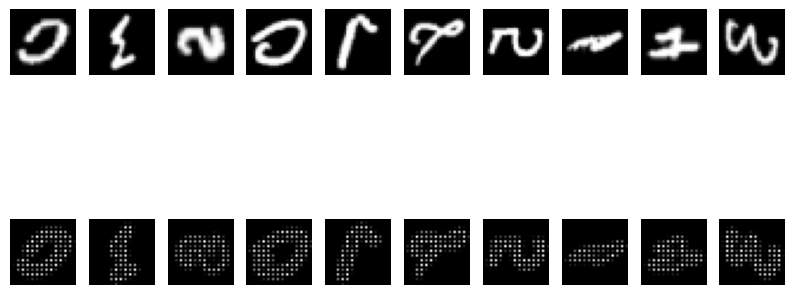

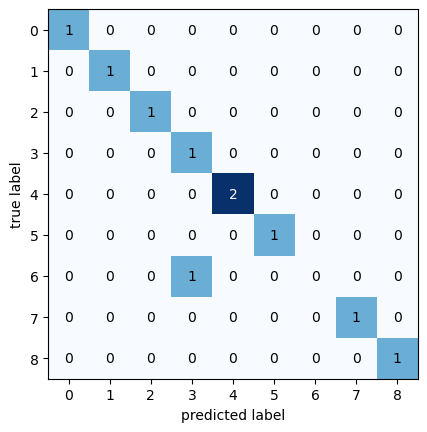

In [66]:
def plot_combined(X_test, hog_images_test):
    fig, axes = plt.subplots(2, 10, figsize=(10, 5))
    class_name = y_test
    # Plot untuk gambar dataset
    for i in range(min(len(X_test), 10)):  
        axes[0, i].imshow(X_test[i].reshape((28, 28)), cmap='gray')
        axes[0, i].axis('off')

    # Plot untuk gambar hasil HOG extraction
    for i in range(min(len(hog_images_test), 10)):  
        axes[1, i].imshow(hog_images_test[i].reshape((28, 28)), cmap='gray')
        axes[1, i].axis('off')

    fig, ax = plot_confusion_matrix(conf_mat=conf_matrix)

    plt.show()

plot_combined(X_test, hog_images_test)